In [69]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [167]:
dat = pd.read_csv('iris.csv' , header = None )
print dat.head()
dat.columns = ['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'type'] 
dat.head()
print dat.shape

#drop missing data
dat = dat.dropna()
#drop specific missing data
dat = dat[pd.notnull(dat['type'])]
print dat.shape

#add index for the type (i.e. 1 for first category, 2 for the second, 3 for the third)
dat['type_idx'] = [0]*len(dat)
count = 1;
for type in dat.type.unique():
    dat['type_idx'] = dat['type_idx'] + (dat.type == type)*[count]
    count += 1 

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
(151, 5)
(150, 5)


In [169]:
dat.describe()
dat.quantile([0.5, 0.99])


,sepal_l,sepal_w,petal_l,petal_w,type_idx
0.50,5.8,3.000,4.35,1.3,2
0.99,7.7,4.151,6.70,2.5,3


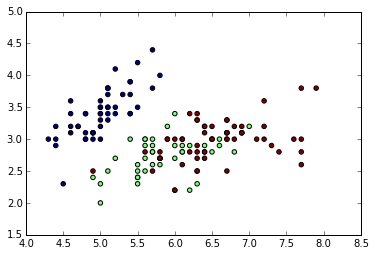

In [164]:
plt.scatter(dat.sepal_l, dat.sepal_w, c = dat.type_idx)

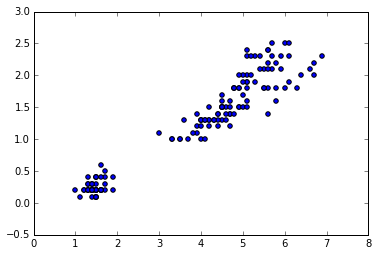

In [97]:
plt.scatter(dat.petal_l, dat.petal_w)

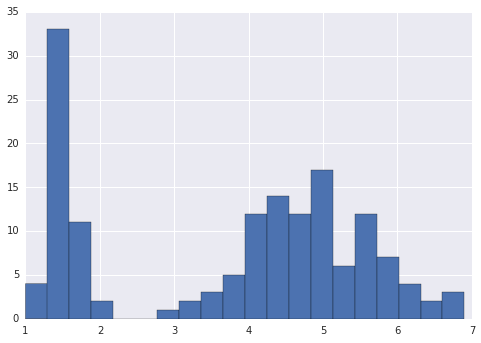

In [202]:
plt.hist(dat.petal_l, 20) 
X.corr()
X.cov()
#outlier
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X) 


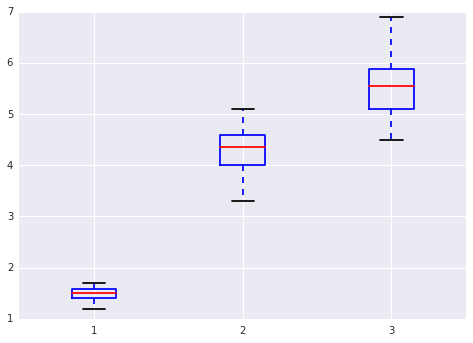

In [197]:
#boxplot
#either format it as [[]]

#
import seaborn as sns
#sns.factorplot('type', hue = 'petal_l', data = dat)

res = []
for species in dat.type.unique():
    res.append(dat['petal_l'].loc[dat.type == species])

plt.boxplot(res)
plt.show()

In [192]:
#
X = dat.iloc[:, 0:4]
Y = dat['type']

#training and testing data
idx = np.random.permutation(len(X))
#or 

X = X.iloc[idx]
Y = Y.iloc[idx] 

training_sample_size = int(0.3* len(dat))
X_train = X[:training_sample_size]
Y_train = Y[:training_sample_size]
X_test =  X[training_sample_size:]
Y_test  = Y[training_sample_size:]

In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [193]:
#KNN neighborhood
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
sum(Y_pred == np.array(Y_test)) / float(len(Y_pred))

0.92380952380952386

In [194]:
#random forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=6, max_depth=None, min_samples_split=1, random_state=0)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
sum(Y_pred == np.array(Y_test)) / float(len(Y_pred))

0.95238095238095233